## Review steps

1. Data collection
2. Data preprocessing
3. train-test split
4. Choosing ml/dl model
5. Train model
6. Do prediction and evaluate the model

In [1]:
import numpy as np # linear algebra import pandas
from numpy import array
import pandas as pd
import math 
import seaborn as sns 
import datetime as dt 
from datetime import datetime
sns.set_style("whitegrid") 
from pandas.plotting import autocorrelation_plot 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot" )
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

## Loading data

In [2]:
data= pd.read_csv("Honda-2.csv",delimiter=";")
data

,Date,Price,Open,High,Low,Volume,Change
0,04/01/2018,"1328,70","1308,30","1328,70","1302,00","14890000,0","0,032200"
1,05/01/2018,"1340,30","1333,30","1351,30","1330,00","14300000,0","0,008700"
2,09/01/2018,"1336,70","1347,30","1352,30","1332,30","10340000,0","-0,002700"
3,10/01/2018,"1367,30","1345,00","1383,70","1342,70","14080000,0","0,022900"
4,11/01/2018,"1342,00","1345,00","1351,70","1332,70","12090000,0","-0,018500"
...,...,...,...,...,...,...,...
1447,08/12/2023,"1458,00","1488,00","1490,00","1450,50","28600000,0","-0,025700"
1448,11/12/2023,"1494,50","1496,00","1501,00","1486,50","14850000,0","0,025000"
1449,12/12/2023,"1477,50","1501,00","1502,00","1477,50","11320000,0","-0,011400"
1450,13/12/2023,"1469,00","1476,50","1477,00","1456,00","14080000,0","-0,005800"


## Data Exploration

In [3]:
# Check the data type of each value column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1452 non-null   object
 1   Price   1452 non-null   object
 2   Open    1452 non-null   object
 3   High    1452 non-null   object
 4   Low     1452 non-null   object
 5   Volume  1452 non-null   object
 6   Change  1452 non-null   object
dtypes: object(7)
memory usage: 79.5+ KB


In [4]:
# Reformat the date data type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Ví dụ cho định dạng dd/mm/yyyy
data['Date']

0      2018-01-04
1      2018-01-05
2      2018-01-09
3      2018-01-10
4      2018-01-11
          ...    
1447   2023-12-08
1448   2023-12-11
1449   2023-12-12
1450   2023-12-13
1451   2023-12-14
Name: Date, Length: 1452, dtype: datetime64[ns]

In [5]:
# Clean data and cast data for calculation
data['Price'] = data['Price'].str.replace(',', '.').astype(float)
data['Open'] = data['Open'].str.replace(',', '.').astype(float)
data['High'] = data['High'].str.replace(',', '.').astype(float)
data['Low'] = data['Low'].str.replace(',', '.').astype(float)
data['Volume'] = data['Volume'].str.replace(',', '.').astype(float)
data['Change'] = data['Change'].str.replace(',', '.').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1452 non-null   datetime64[ns]
 1   Price   1452 non-null   float64       
 2   Open    1452 non-null   float64       
 3   High    1452 non-null   float64       
 4   Low     1452 non-null   float64       
 5   Volume  1452 non-null   float64       
 6   Change  1452 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.5 KB


In [6]:
# Gets descriptive statistical information about a DataFrame or a Series
data.describe()

,Date,Price,Open,High,Low,Volume,Change
count,1452,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,2020-12-26 16:00:59.504132352,1105.688912,1106.123485,1115.705579,1095.946556,1.393168e+07,0.000222
min,2018-01-04 00:00:00,711.800000,717.200000,746.700000,706.700000,3.360000e+06,-0.071000
25%,2019-07-01 18:00:00,995.375000,995.725000,1005.600000,986.525000,1.040000e+07,-0.010100
50%,2020-12-28 12:00:00,1087.000000,1088.300000,1097.150000,1078.150000,1.284000e+07,0.000000
75%,2022-06-24 18:00:00,1172.700000,1174.400000,1181.325000,1163.850000,1.624750e+07,0.010225
max,2023-12-14 00:00:00,1802.300000,1802.300000,1821.000000,1780.000000,4.645000e+07,0.106200
std,NaN,183.522697,184.289369,184.962911,182.567989,5.240151e+06,0.018327


## Data Visualization

In [7]:
# Reshape turns df into a NumPy array of size (-1, 1)
df=data['Price'].values
df = df.reshape(-1, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Perform data normalization according to the min-max scaling method
price_scaled=scaler.fit_transform(df) # Fit và transform the data
price_scaled

array([[0.56570381],
       [0.57634113],
       [0.57303989],
       ...,
       [0.70215497],
       [0.69436039],
       [0.62696011]])

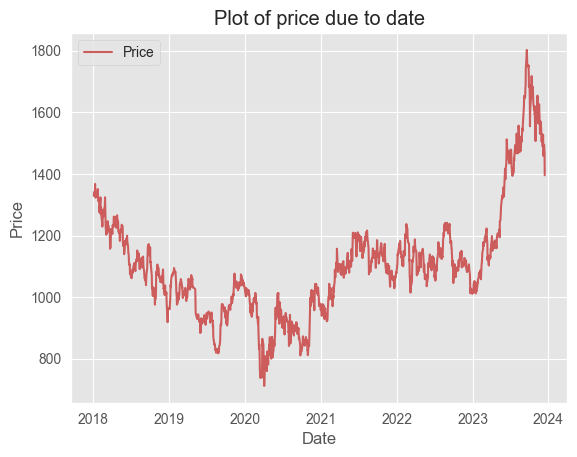

In [9]:
# Create plot
plt.figure(figure=(10,6))
plt.plot(data['Date'],data['Price'].values, label="Price", color="IndianRed")

# Adding title
plt.title("Plot of price due to date")

# Adding label
plt.xlabel("Date")
plt.ylabel("Price")

# Show the plot
plt.legend()
plt.show()

## Data Preprocessing

### Split data into training and testing set

In [10]:
def Train_test_split(sequence, n_steps, train_size, test_size):

    data_train = sequence[:train_size]  # Extract the training data
    data_test = sequence[train_size:train_size+test_size]  # Extract the testing data

    X_train, X_test, y_train, y_test = [], [], [], []  # Initialize empty lists

    # Create data samples and corresponding labels for each set
    for i in range(len(data_train) - n_steps):
        X_train.append(data_train[i:i+n_steps])  # Add data samples to X_train
        y_train.append(data_train[i+n_steps])  # Add data samples to y_train

    for i in range(len(data_test) - n_steps):
        X_test.append(data_test[i:i+n_steps])
        y_test.append(data_test[i+n_steps])


    return array(X_train), array(X_test), array(y_train), array(y_test),  # Return into NumPy arrays


## Proposed model

### CNN+GRU

In [11]:
from keras.models import Sequential
from keras.utils import set_random_seed
from keras.callbacks import EarlyStopping
from keras.layers import GRU, Dense, ConvLSTM2D, ConvLSTM1D, Dropout,Conv2D, TimeDistributed, Conv1D, MaxPooling1D, Flatten, RepeatVector, MaxPooling2D, MaxPooling3D, BatchNormalization
from keras.optimizers import Adam

def CNN_GRU_model(X_train, y_train, X_test, y_test, loss='mse'):
    model = Sequential()

    # Convolutional layer for spatial feature extraction
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2)) # Downsample features

    # GRU layer for sequential processing
    model.add(GRU(200, activation='relu', return_sequences=True))  # Use GRU 

    # Dense layers for final output
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    # Compile the model with the desired optimizer and loss
    model.compile(optimizer='adam', loss=loss)

    # Train the model with early stopping
    callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')
    model.fit(X_train, y_train, epochs=300, verbose=1, validation_data=(X_test, y_test), callbacks=[callback])

    return model

In [12]:
# Evaluate model
def Eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_inverted = scaler.inverse_transform(y_pred.reshape(y_pred.shape[0],-1))
    y_test_inverted = scaler.inverse_transform(y_test.reshape(y_test.shape[0],-1))
    rmse = round(mean_squared_error(y_test_inverted, y_pred_inverted, squared=False),1)
    mape = round(mean_absolute_percentage_error(y_test_inverted, y_pred_inverted)*100,2)
    mae = round(mean_absolute_error(y_test_inverted, y_pred_inverted),1)
    hl= mean_squared_error(y_test, y_pred, multioutput='raw_values')
    return y_pred_inverted, rmse, mape, mae, hl

## Training and testing model

#### Train 80% - Test 20%

In [13]:
train_size = int(0.8*len(price_scaled))
test_size = int(0.2*len(price_scaled))
time_step = 100
X_train, X_test, y_train, y_test = Train_test_split(price_scaled, n_steps=time_step, train_size=train_size, test_size=test_size)

In [14]:
n_seq = 2
X_train = X_train.reshape(X_train.shape[0], n_seq, time_step//n_seq, 1)
X_test = X_test.reshape(X_test.shape[0], n_seq, time_step//n_seq, 1)

In [15]:
X_train.shape

(1061, 2, 50, 1)

In [16]:
model = CNN_GRU_model(X_train, y_train, X_test, y_test)

Epoch 1/300
34/34 [==============================] - 1s 5ms/step - loss: 0.0105 - val_loss: 0.0270
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0180
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0048
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0045
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0048
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0047
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0042
Epoch 11/

In [17]:
y_pred_test, rmse, mape, mae,hl = Eval_model(model, X_test, y_test)
print(f"RMSE score of the model: {rmse}")
print(f"MAPE score of the model: {mape}%")
print(f"MAE score of the model: {mae}")
print(f"Huber loss of the model: {hl}")

6/6 [==============================] - 0s 2ms/step
RMSE score of the model: 53.9
MAPE score of the model: 2.8%
MAE score of the model: 40.5
Huber loss of the model: [0.00244044]


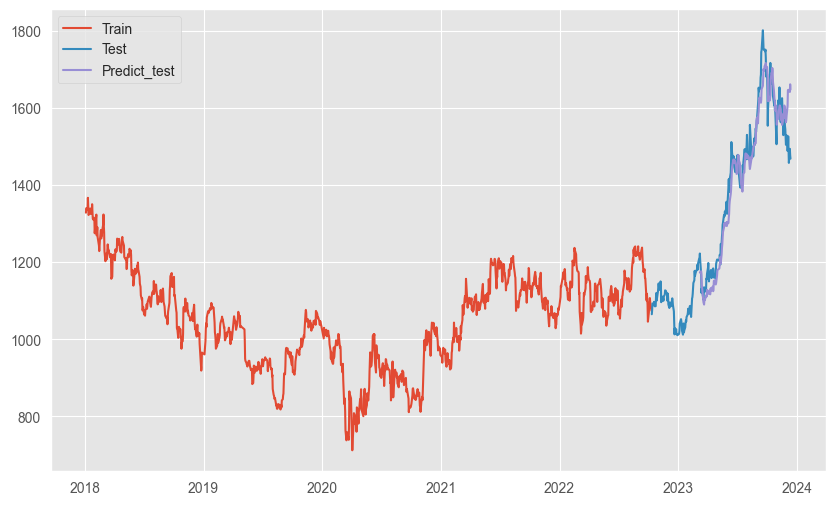

In [18]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'][:train_size], df[:train_size].flatten(), label = "Train")
plt.plot(data['Date'][train_size:train_size+test_size], df[train_size:train_size+test_size].flatten(), label = "Test")
plt.plot(data['Date'][train_size+time_step:train_size+test_size], y_pred_test, label = "Predict_test")
plt.legend()
plt.show()

## Predict

In [19]:
y_pred_30days = []
time_30days = pd.Series(pd.date_range(data['Date'][-1:].values[0], periods=30, freq='D'))
temp_input = price_scaled[-time_step:]

In [20]:
for i in tqdm(range(30)):
    pred_next_day = model.predict(temp_input[i:i+time_step].reshape(1,n_seq,time_step//n_seq,1), verbose=0)
    y_pred_30days.append(scaler.inverse_transform(pred_next_day[0].reshape(1, -1))[0][0])
    temp_input = np.append(temp_input, pred_next_day)

100%|███████████████████████████████████████████| 30/30 [00:00<00:00, 48.29it/s]


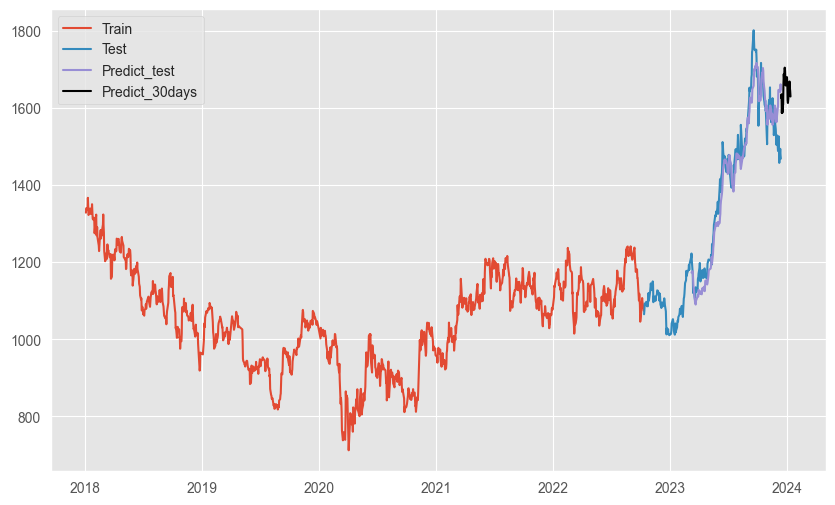

In [21]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'][:train_size], df[:train_size].flatten(), label = "Train")
plt.plot(data['Date'][train_size:train_size+test_size], df[train_size:train_size+test_size].flatten(), label = "Test")
plt.plot(data['Date'][train_size+time_step:train_size+test_size], y_pred_test, label = "Predict_test")
plt.plot(time_30days, y_pred_30days, label = "Predict_30days", color='black')
plt.legend()
plt.show()

**Conclusion:**
- **The model can predict values relatively accurately**. The values of RMSE, MAPE and MAE are all within acceptable ranges for continuous value prediction tasks.
- **The model can improve its performance if it is trained on more data**. The values of RMSE, MAPE and MAE of the model with a train/test ratio of 6/4 are lower than those of the other two models, indicating that training the model with more data can help the model learn better features and predict values more accurately.
- **The model can improve its performance if its network structure is adjusted**. You can experiment with different network architectures, adjusting the number of layers, kernel size, number of filters, etc. to find the most suitable structure for your specific data and task.
 
**Conclusion:**

 The model can predict values relatively accurately, but its performance can still be improved if it is trained on more data and its network structure is adjusted.

**Model selection:**

 Depending on the specific requirements of the task, you can choose the appropriate model. If you require high accuracy, you can choose the model with a train/test ratio of 6/4. If you require a fast and lightweight model, you can choose the model with a train/test ratio of 7/3 or 6/4.

